In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd 
import numpy as np 

# 解决坐标轴刻度负号乱码
plt.rcParams['axes.unicode_minus'] = False

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']

# 常用聚合函数


|指标|描述|
| --------   | -----:  |
| count()        |  计数项     |  
|    first()、last()     |   第一项和最后一项    | 
| mean()、median()        |  均值与中位数    |  
| min()、max()        | 最大值与最小值      |   
| std()、var()        |  标准差与方差     |  
| mad()        |   均值绝对偏差    |  
| prod()        |  所有项乘积     | 
| sum()        |   所有项求和    |   

In [19]:
titanic=pd.read_csv("titanic.csv",encoding="utf_8",index_col="Unnamed: 0")

titanic=titanic[["船舱等级","年龄"]]
titanic.head()

船舱等级    年龄
0     3  22.0
1     1  38.0
2     3  26.0
3     1  35.0
4     3  35.0

In [20]:
titanic.mean()  #axis可以设置为"columns"（等同于1）或者"index"（等同于0）

船舱等级     2.308642
年龄      29.699118
dtype: float64

```
    
   
   
    
   
   
```
# groupby分组
## 分组与聚合

In [21]:
titanic=pd.read_csv("titanic.csv",encoding="utf_8",index_col="Unnamed: 0")
titanic_01=titanic.head()[["性别","年龄","船舱等级"]]  #取前五行出来举例子
titanic_01

性别    年龄  船舱等级
0  男  22.0     3
1  女  38.0     1
2  女  26.0     3
3  女  35.0     1
4  男  35.0     3

In [22]:
titanic_01.groupby("性别")["年龄"].mean()

性别
女    33.0
男    28.5
Name: 年龄, dtype: float64

In [23]:
titanic_01.groupby("性别")['年龄'].mean()

性别
女    33.0
男    28.5
Name: 年龄, dtype: float64

groupby操作是如何实现的？

In [24]:
#分割
titanic_01.groupby("性别")

#应用与组合
titanic_01.groupby("性别")["年龄"].mean()

性别
女    33.0
男    28.5
Name: 年龄, dtype: float64

DataFrame和Series的方法都可以由GroupBy方法调用：

In [25]:
titanic_01.groupby("性别")["年龄"].max()

性别
女    38.0
男    35.0
Name: 年龄, dtype: float64

## 练习
不同船舱等级中，年龄最小的分别是多少？

不同船舱等级的人数分别是多少？

```

    
   
   
```
## 探究groupby对象

In [26]:
titanic_01.groupby("性别")

In [27]:
list(titanic_01.groupby("性别"))

[('女',
    性别    年龄  船舱等级
  1  女  38.0     1
  2  女  26.0     3
  3  女  35.0     1),
 ('男',
    性别    年龄  船舱等级
  0  男  22.0     3
  4  男  35.0     3)]

groupby对象其实是可以直接按组进行迭代的，每一组都是Series或DataFrame,如果我们将上面的groupby对象转化为list来看，你会发现：

In [28]:
list(titanic_01.groupby("性别"))

[('女',
    性别    年龄  船舱等级
  1  女  38.0     1
  2  女  26.0     3
  3  女  35.0     1),
 ('男',
    性别    年龄  船舱等级
  0  男  22.0     3
  4  男  35.0     3)]

In [29]:
for i,j in titanic_01.groupby("性别"):
    print("类别—%s"%i)
    print("该类别对应的pandas对象是：")
    print(j,"\n")

类别—女
该类别对应的pandas对象是：
  性别    年龄  船舱等级
1  女  38.0     1
2  女  26.0     3
3  女  35.0     1 

类别—男
该类别对应的pandas对象是：
  性别    年龄  船舱等级
0  男  22.0     3
4  男  35.0     3 



In [30]:
j

性别    年龄  船舱等级
0  男  22.0     3
4  男  35.0     3

In [31]:
type(j)

pandas.core.frame.DataFrame

```

   
   
```
## 依据多个键分组

In [32]:
titanic_01

性别    年龄  船舱等级
0  男  22.0     3
1  女  38.0     1
2  女  26.0     3
3  女  35.0     1
4  男  35.0     3

如果想依据多个键进行分割，groupby()中设定多个字段名的列表即可：

In [33]:
titanic_01.groupby(["性别","船舱等级"])['年龄'].mean()

性别  船舱等级
女   1       36.5
    3       26.0
男   3       28.5
Name: 年龄, dtype: float64

# 多级索引对象

## 多级索引的Series

从上面我们会看到，依据多个键进行分组的结果，返回了有两级索引的Series对象，那么这种对象该如何取值？

In [35]:
mul_series=titanic_01.groupby(["性别","船舱等级"])["年龄"].mean()
mul_series

性别  船舱等级
女   1       36.5
    3       26.0
男   3       28.5
Name: 年龄, dtype: float64

In [36]:
mul_series.index

MultiIndex([('女', 1),
            ('女', 3),
            ('男', 3)],
           names=['性别', '船舱等级'])

### 通过Series自带的索引值

Series对象自带的索引数值体系依然可以使用。

In [37]:
mul_series

性别  船舱等级
女   1       36.5
    3       26.0
男   3       28.5
Name: 年龄, dtype: float64

In [38]:
mul_series[2]

28.5

In [39]:
mul_series[0:2]

性别  船舱等级
女   1       36.5
    3       26.0
Name: 年龄, dtype: float64

### 通过一级索引标签

以mul_series为举例：

In [40]:
mul_series

性别  船舱等级
女   1       36.5
    3       26.0
男   3       28.5
Name: 年龄, dtype: float64

比如我们想取上面一级索引为“女”的所有数据：

In [41]:
mul_series['男']

船舱等级
3    28.5
Name: 年龄, dtype: float64

取一级索引，标签为“女”到“男”的数据，包括“男”：

In [42]:
mul_series['女':"男"]

性别  船舱等级
女   1       36.5
    3       26.0
男   3       28.5
Name: 年龄, dtype: float64

### 通过二级或以上索引标签

以mul_series为举例：

In [43]:
mul_series

性别  船舱等级
女   1       36.5
    3       26.0
男   3       28.5
Name: 年龄, dtype: float64

如果我们要取上面的Series中船舱等级为3的所有数据，该如何取？

In [44]:
mul_series[:,3]

性别
女    26.0
男    28.5
Name: 年龄, dtype: float64

## 多级索引的DataFrame

按照两个字段进行分组，从上面会发现，以Series对象呈现出来的结果，索引有点“不整齐”，我们把上面的Series转化成DataFrame看一下：

In [45]:
mul_index_df=pd.DataFrame(titanic_01.groupby(["性别","船舱等级"])["年龄"].mean())
mul_index_df

年龄
性别 船舱等级      
女  1     36.5
   3     26.0
男  3     28.5

索引变成两级，一级是“性别”，第二级是“船舱等级”，把上面的DataFrame中的两级索引单独提取出来观察：

In [46]:
mul_index_df.index

MultiIndex([('女', 1),
            ('女', 3),
            ('男', 3)],
           names=['性别', '船舱等级'])

那么，对于这种双重索引的DataFrame表格，又该如何取数呢？

In [47]:
mul_index_df

年龄
性别 船舱等级      
女  1     36.5
   3     26.0
男  3     28.5

提取性别为女的数据？

In [48]:
mul_index_df.loc["女",:]   # 锁定一级行索引标签为‘女’，且锁定所有的列值

年龄
船舱等级      
1     36.5
3     26.0

提取船舱等级为3的数据？这个时候，需要使用IndexSlice对象（索引切片器）

In [49]:
mul_index_df

年龄
性别 船舱等级      
女  1     36.5
   3     26.0
男  3     28.5

In [50]:
idx=pd.IndexSlice

mul_index_df.loc[idx[:,3],:]

年龄
性别 船舱等级      
女  3     26.0
男  3     28.5

# 索引的重置与设置（新增）

## .reset_index()方法

In [51]:
idx=pd.IndexSlice

mul_index_02=mul_index_df
mul_index_02

年龄
性别 船舱等级      
女  1     36.5
   3     26.0
男  3     28.5

如何把上面的多级索引全部转化为一列列单独的字段？然后用序列数字重新变成新表的索引呢？

In [52]:
mul_index_02.reset_index()

性别  船舱等级    年龄
0  女     1  36.5
1  女     3  26.0
2  男     3  28.5

如果想保留索引“船舱等级”，只是把索引“性别”变成单独的一列字段呢？  
可以在.reset_index()方法中用参数level指定要转化成字段的索引名：

In [53]:
mul_index_02

年龄
性别 船舱等级      
女  1     36.5
   3     26.0
男  3     28.5

In [54]:
mul_index_02.reset_index(level='性别')

性别    年龄
船舱等级         
1     女  36.5
3     女  26.0
3     男  28.5

## .set_index()方法

In [55]:
mul_index_03=mul_index_02.reset_index()
mul_index_03

性别  船舱等级    年龄
0  女     1  36.5
1  女     3  26.0
2  男     3  28.5

如何把上面的性别和船舱等级两列字段，指定作为索引？  
用.set_index()即可：

In [56]:
mul_index_03.set_index(["性别"])

船舱等级    年龄
性别            
女      1  36.5
女      3  26.0
男      3  28.5

```
    
   
   
    
   
   
```
# 分组后累积、过滤、转换、应用

## 分组后合计aggregate()

In [62]:
titanic.head()

幸存否  船舱等级 性别    年龄 年龄段
0    0     3  男  22.0  青年
1    1     1  女  38.0  青年
2    1     3  女  26.0  青年
3    1     1  女  35.0  青年
4    0     3  男  35.0  青年

如果想看不同性别乘客的：船舱等级的众数、年龄的均值呢？  
此时可以使用groupby对象的aggregate()方法，填入带映射关系的字典即可：

In [63]:
titanic.groupby("性别").aggregate({"船舱等级":np.median,"年龄":np.mean})

船舱等级         年龄
性别                 
女      2  27.915709
男      3  30.726645

 ```
    
  
   
   
```
## 分组后过滤filter()

如果分组之后，想要对小组数据聚合情况进行组筛选（将属于某类组的数据都删除），该怎么做？  
这时，分组之后可以用filter()方法： 

In [64]:
titanic=pd.read_csv("titanic.csv",encoding="utf_8",index_col="Unnamed: 0")
titanic.head()

幸存否  船舱等级 性别    年龄 年龄段
0    0     3  男  22.0  青年
1    1     1  女  38.0  青年
2    1     3  女  26.0  青年
3    1     1  女  35.0  青年
4    0     3  男  35.0  青年

In [65]:
titanic=pd.read_csv("titanic.csv",encoding="utf_8",index_col="Unnamed: 0")

titanic.groupby("性别").aggregate([sum,np.mean])

幸存否            船舱等级                  年龄           
    sum      mean   sum      mean       sum       mean
性别                                                    
女   233  0.742038   678  2.159236   7286.00  27.915709
男   109  0.188908  1379  2.389948  13919.17  30.726645

titanic中各年龄段的年龄标准差情况如下:

In [66]:
titanic.groupby("年龄段")["年龄"].std()

年龄段
中年    5.369605
儿童    3.390390
少年    1.438688
老年    5.024884
青年    6.027229
Name: 年龄, dtype: float64

使用filter()方法，将年龄标准差小于2的年龄组删除,只保留标准差大于等于2的年龄组：

In [67]:
def filer_func(x):
    return x["年龄"].std()>2     #这里面的x其实是用来传输groupby对象的每一小组

titanic_02=titanic.groupby("年龄段").filter(filer_func)
titanic_02.head()

幸存否  船舱等级 性别    年龄 年龄段
0    0     3  男  22.0  青年
1    1     1  女  38.0  青年
2    1     3  女  26.0  青年
3    1     1  女  35.0  青年
4    0     3  男  35.0  青年

我们再看一下各年龄段的年龄标准差，标准差小于2的年龄段数据已经删除：

In [68]:
titanic_02.groupby("年龄段")["年龄"].std()

年龄段
中年    5.369605
儿童    3.390390
老年    5.024884
青年    6.027229
Name: 年龄, dtype: float64

 ```
    
   
   
```
## 分组后转换transform()

group对象的transform()方法,在数据转换之后的形状和原来的是一样的，但是并不是单纯地将一列数据转换，   
而对是分组之后，不同小组的数据内部按照相同的逻辑和组内指标来转换，常见的例子是实现数据组内标准化：

In [69]:
titanic=pd.read_csv("titanic.csv",encoding="utf_8",index_col="Unnamed: 0").dropna()
titanic_03=titanic.loc[:,["年龄段","年龄"]]
titanic_03.head()

年龄段    年龄
0  青年  22.0
1  青年  38.0
2  青年  26.0
3  青年  35.0
4  青年  35.0

如果我们想以年龄分组，对每个人的年龄进行组内标准化(每个人的年龄减去自己年龄组的年龄均值):

In [70]:
def standar(x):
    return x-x.mean()    #这里面的x其实是用来传输groupby对象的每一小组，x-x.mean()其实用了广播
    
titanic_03.groupby("年龄段").transform(standar)

年龄
0    -6.365882
1     9.634118
2    -2.365882
3     6.634118
4     6.634118
..         ...
885  10.634118
886  -1.365882
887  -9.365882
889  -2.365882
890   3.634118

[714 rows x 1 columns]

```
    
  
   
   
```
## 分组后应用apply()

如果你想在分组后对小组使用任意方法，可以使用apply()。
- 输入一个分组数据的DataFrame进apply()，可以返回一个DataFrame或Series或一个标量。
- group()和apply()的组合操作可以适应apply()返回的结果类型，因此非常灵活。

In [71]:
titanic=pd.read_csv("titanic.csv",encoding="utf_8",index_col="Unnamed: 0").dropna()
titanic_03=titanic.loc[:,["性别","船舱等级"]]
titanic_03.head()

性别  船舱等级
0  男     3
1  女     1
2  女     3
3  女     1
4  男     3

我们看一下不同船舱等级的男女性别人数分布：

In [72]:
titanic_03.groupby("船舱等级")["性别"].value_counts()

船舱等级  性别
1     男     101
      女      85
2     男      99
      女      74
3     男     253
      女     102
Name: 性别, dtype: int64

如果我们想以“船舱等级”为分组，如果这个船舱等级的男性多，则将该船舱等级改为“男多年龄段”，反之亦然：

In [73]:
def more(x):
    i=x["性别"].value_counts().index[0]        # 这里面的x其实是用来传输groupby对象中的每一小组
    return "%s性的多船舱等级"%i

titanic_03.groupby("船舱等级").apply(more)

船舱等级
1    男性的多船舱等级
2    男性的多船舱等级
3    男性的多船舱等级
dtype: object

```
    
   
   
    
   
   
```
# 透视表（自学拓展）

##  pd.pivot_table()
```
pd.pivot_table(values=None, index=None, columns=None, aggfunc='mean',     
                fill_value=None, margins=False, dropna=True, margins_name='All')
```
- values：要聚合的列，可选
- index：在数据透视表索引上分组的键。
- columns：在数据透视表列上分组的键。
- aggfunc：function，function of list，dict，default numpy.mean
    - 如果传递的函数列表，则生成的数据透视表将具有分层列。
    - 如果传递了dict，则键是要聚合的列，值是函数或函数列表。
- fill_value：标量，默认无，用于替换缺失值的值。
- margin：boolean，默认为False，添加所有行/列（例如，对于小计/总计）。
- dropna：布尔值，默认为True，不包括条目全部为NaN的列
- margins_name：string，默认为'All'，当边距为真时，将包含总计的行/列的名称。

In [74]:
titanic=pd.read_csv("titanic.csv",encoding="utf_8",index_col="Unnamed: 0")
titanic.head()

幸存否  船舱等级 性别    年龄 年龄段
0    0     3  男  22.0  青年
1    1     1  女  38.0  青年
2    1     3  女  26.0  青年
3    1     1  女  35.0  青年
4    0     3  男  35.0  青年

如果我们想要查看泰坦尼克乘客的生存率状况，从性别和船舱等级两个维度观察：

In [75]:
titanic.pivot_table("幸存否",index="性别",columns="船舱等级")

船舱等级         1         2         3
性别                                
女     0.968085  0.921053  0.500000
男     0.368852  0.157407  0.135447

默认多维分析的对象是均值。

In [76]:
df=titanic.pivot_table("幸存否",index="性别",columns="船舱等级")
df.plot(kind="bar",title="不同性别与船舱等级的幸存率对比");

### 参数aggfunc

如果我们多维分析"幸存否"的不是均值，而是总人数，这时候就需要用aggfunc参数指定聚合函数：

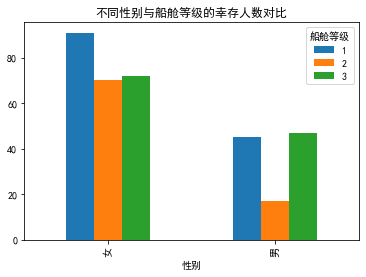

In [77]:
df=titanic.pivot_table("幸存否",index="性别",columns="船舱等级",aggfunc="sum")
df.plot(kind="bar",title="不同性别与船舱等级的幸存人数对比");

如果我们想求幸存者的总人数，也想求幸存者的平均年龄：

In [78]:
titanic.pivot_table(index="性别",columns="船舱等级",aggfunc={"幸存否":"sum","年龄":"mean"})

年龄                       幸存否        
船舱等级          1          2          3   1   2   3
性别                                               
女     34.611765  28.722973  21.750000  91  70  72
男     41.281386  30.740707  26.507589  45  17  47

### 参数margins

In [79]:
titanic.pivot_table("幸存否",index="性别",columns="船舱等级",aggfunc="sum",margins=True)

船舱等级    1   2    3  All
性别                     
女      91  70   72  233
男      45  17   47  109
All   136  87  119  342

```
    
   
      
```
## 多级透视表

In [80]:
titanic.pivot_table("幸存否",index=["性别","年龄段"],columns="船舱等级")

船舱等级           1         2         3
性别 年龄段                              
女  中年   0.958333  0.846154  0.000000
   儿童   0.000000  1.000000  0.478261
   少年   1.000000  1.000000  0.550000
   老年   1.000000       NaN  1.000000
   青年   0.979167  0.914894  0.480000
男  中年   0.342105  0.055556  0.074074
   儿童   1.000000  1.000000  0.360000
   少年   0.500000  0.000000  0.076923
   老年   0.083333  0.333333  0.000000
   青年   0.478261  0.063492  0.146199